# Two Traveling Salespeople

Points: 10

## Two-person Version of the [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the two tours which collectively visit each of $n$ cities exactly once and return back to the same starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a pair of tours, where the first element of the pair are the cities to visit for the first person and the second element are the cities to visit for the second person. The cities are numbered and the tours can be expressed a pair of vectors $(\pi_1, \pi_2)$ with the order in which the cities are visited. That is, $\pi_i(1)$ is the index of the first city to visit by the $i$th person ($i$ either is 1 or 2), $\pi_i(2)$ the index of the second city to visit by the $i$th person, and so on.

* __Objective function:__ Minimize the maximum tour length for both people. Informally, the cities should be divided up roughly evenly between the two people so that neither one has a tour that is too long.

The optimization problem is to find the optimal pair of tours $\pi_1^*$ and $\pi_2^*$ through the $n$ cities and which return to the start cities of each tour:

  > minimize: $\max(\mathrm{tourlength}(\pi_1), \mathrm{tourlength}(\pi_2))$
  where $\mathrm{tourlength}(\pi_i) = d_{\pi_i(n),\pi_i(1)} + \sum_{j = 1}^{n-1} d_{\pi_i(j),\pi_i(j+1)}$
  >
  > subject to: every city must be visited exactly once


## Helper functions

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

np.set_printoptions(precision=2)

np.random.seed(0) # make the results repeatable

In [42]:
def random_tour_pair(n):
    """Create two random tours with n cities"""

    tour = list(range(n))
    np.random.shuffle(tour)

    split_index = np.random.randint(0, n-1)
    tour1 = tour[:split_index]
    tour2 = tour[split_index:]

    return tour1, tour2

random_tour_pair(10)

([4, 8, 1], [7, 9, 2, 0, 6, 5, 3])

In [43]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))
    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
          x         y
0  0.678880  0.135218
1  0.720633  0.324141
2  0.582020  0.149675
3  0.537373  0.222321
4  0.758616  0.386489
5  0.105908  0.902598
6  0.473600  0.449950
7  0.186332  0.613063
8  0.736918  0.902349
9  0.216550  0.099280
Distance matrix:
          0         1         2         3         4         5         6  \
0  0.000000  0.193482  0.097933  0.166166  0.263619  0.957690  0.375760   
1  0.193482  0.000000  0.222827  0.209646  0.073007  0.844097  0.277223   
2  0.097933  0.222827  0.000000  0.085269  0.295410  0.890829  0.319249   
3  0.166166  0.209646  0.085269  0.000000  0.275498  0.805568  0.236393   
4  0.263619  0.073007  0.295410  0.275498  0.000000  0.832104  0.291995   
5  0.957690  0.844097  0.890829  0.805568  0.832104  0.000000  0.583171   
6  0.375760  0.277223  0.319249  0.236393  0.291995  0.583171  0.000000   
7  0.686250  0.607415  0.609342  0.525270  0.615503  0.300497  0.330347   
8  0.769323  0.578437  0.768447  0.708700  0.516316  0.

In [84]:
def tour_pair_max_length(tsp, tour_pair):
   """Calculate the maximum length of a pair of tours, i.e., the objective function."""

   tour0_len = tour_length(tsp, tour_pair[0])
   tour1_len = tour_length(tsp, tour_pair[1])

   return max(tour0_len, tour1_len)

def tour_length(tsp, tour):
    """Caclulate the length of a single tour"""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]
    if len(tour)>0:
        tl += dist[tour[-1], tour[0]]

    return(tl)

np.random.seed(0) # make the results repeatable
tour_pair = random_tour_pair(10)
print(tour_pair)
print(f"objective value: {tour_pair_max_length(tsp, tour_pair)}")

([2, 8, 4, 9], [1, 6, 7, 3, 0, 5])
objective value: 3.1007928939594622


Tour length (red): 1.5
Tour length (blue): 2.78


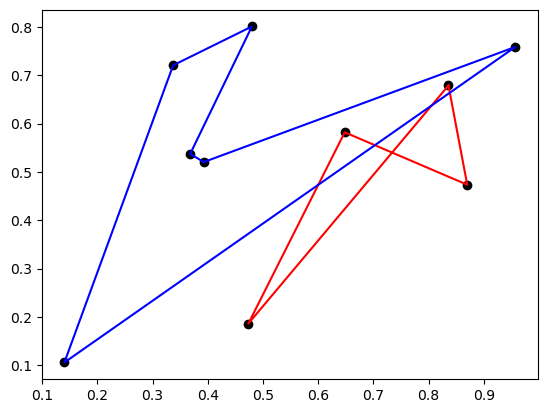

In [25]:
def show_2tsp(tsp, tour_pair = None):
    """display the twoperson traveling salesman problem and a tour pair."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"], color='black')

    if tour_pair is not None:
      colors = ['red', 'blue']

      for tour, color in zip(tour_pair, colors):
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length ({color}): {round(tour_length(tsp, tour), 2)}")
        tour_x_list = [pos.loc[i, 'x'] for i in tour]
        tour_y_list = [pos.loc[i, 'y'] for i in tour]

        # wrap back to start
        tour_x_list.append(tour_x_list[0])
        tour_y_list.append(tour_y_list[0])

        plt.plot(tour_x_list, tour_y_list, color)

    plt.show()

show_2tsp(tsp, tour_pair)

## Steepest-ascent Hill Climbing Search [2 Points]

Come up with reasonable definition for local moves and explain it in text. Implement a steepest-ascent hill climbing strategy. Measure and report the performance of this on 50 random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [106]:
# Start State: predefined random tour
# Local moves:
# 1. Move one point from a tour to the end of the other tour
# 2. Swap a pair of points in the order of a tour
def generate_states(tour_pair):
    states = []
    tour1 = tour_pair[0]
    tour2 = tour_pair[1]
    # get states for action 1 
    for i in range(len(tour1)):#move a point from tour 1
        t1 = tour1[0:i]+tour1[i+1:]
        t2 = tour2+[tour1[i]]
        states.append((t1,t2))
    for i in range(len(tour2)):#move a point from tour 2
        t2 = tour2[0:i]+tour2[i+1:]
        t1 = tour1+[tour2[i]]
        states.append((t1,t2))
    # get states for action 2
    if len(tour1)>=2:
        for i in range(len(tour1)-1):
            for j in range(i+1,len(tour1)):
                sub1 = tour1[i]
                sub2 = tour1[j]
                t1 = tour1.copy()
                t1[i]=sub2
                t1[j]=sub1
                states.append((t1,tour2))
    if len(tour2)>=2:
        for i in range(len(tour2)-1):
            for j in range(i+1,len(tour2)):
                sub1 = tour2[i]
                sub2 = tour2[j]
                t2 = tour2.copy()
                t2[i]=sub2
                t2[j]=sub1
                states.append((tour1,t2))
    return states

def steepest_ascent_hill_climbing(tsp,tour_pair):
    dist = tsp['dist']
    current = tour_pair
    moves=0
    while True:
        states = generate_states(current)
        newState = current
        for state in states:
            if tour_pair_max_length(tsp,newState)>tour_pair_max_length(tsp,state):
                newState = state;
                moves+=1
        if newState == current:
            return newState,moves
        current = newState
    return []

objFunctions = []
localMoves = []
for i in range(50):
    tour_pair = random_tour_pair(10)
    tsp = random_tsp(10)
    stahc = steepest_ascent_hill_climbing(tsp,tour_pair)
    objFunctions.append(tour_pair_max_length(tsp,stahc[0]))
    print("Instance ",i+1,":",tour_pair_max_length(tsp,stahc[0]))
    localMoves.append(stahc[1])
print("Average Objective Function: ", sum(objFunctions)/len(objFunctions))
print("Average Local Moves: ", sum(localMoves)/len(localMoves))


Instance  1 : 2.4678398792947602
Instance  2 : 2.84873906657744
Instance  3 : 2.656175794223432
Instance  4 : 2.4719545729632113
Instance  5 : 1.968846767120671
Instance  6 : 1.8229541794798287
Instance  7 : 2.034771537839174
Instance  8 : 1.6076429724693544
Instance  9 : 2.070896888377399
Instance  10 : 1.8424681942522434
Instance  11 : 2.3120966718375033
Instance  12 : 2.539702253706663
Instance  13 : 1.5180437612687028
Instance  14 : 1.9704687373241279
Instance  15 : 2.1770399496320025
Instance  16 : 2.2096687128287797
Instance  17 : 2.098113590625413
Instance  18 : 1.8586894605321156
Instance  19 : 2.7998141256643847
Instance  20 : 1.7408714955442754
Instance  21 : 2.3924455811289422
Instance  22 : 2.45292542757041
Instance  23 : 2.3922932072652427
Instance  24 : 2.13738561130996
Instance  25 : 2.1819813499221423
Instance  26 : 2.174172123355116
Instance  27 : 1.998091918697143
Instance  28 : 1.5526115692330777
Instance  29 : 2.0301933858894032
Instance  30 : 1.8288931793890462
Ins

## Steepest-ascent Hill Climbing Search with Random Restarts [1 Point]

Modify the code to include random restarts once improvement is no longer possible. For a fixed problem instance, analyze the improvement in the objective function as more restarts are done. Plot the number of restarts on the x axis and the objective function on the y axis.

Restarts: 1 : 1.7157844071417638
Restarts: 2 : 1.5768039154779385
Restarts: 3 : 1.5271590910847217
Restarts: 4 : 1.3089108080523404
Restarts: 5 : 1.7124522329443526
Restarts: 6 : 1.3089108080523402
Restarts: 7 : 1.3089108080523404
Restarts: 8 : 1.3089108080523404
Restarts: 9 : 1.4750941453926543
Restarts: 10 : 1.5037973267683618
Restarts: 11 : 1.3089108080523402
Restarts: 12 : 1.3089108080523402
Restarts: 13 : 1.3089108080523402
Restarts: 14 : 1.4750941453926543
Restarts: 15 : 1.3089108080523404
Restarts: 16 : 1.3089108080523402
Restarts: 17 : 1.3089108080523402
Restarts: 18 : 1.3089108080523404
Restarts: 19 : 1.3089108080523402
Restarts: 20 : 1.3089108080523402
Restarts: 21 : 1.3089108080523402
Restarts: 22 : 1.3089108080523402
Restarts: 23 : 1.3089108080523402
Restarts: 24 : 1.3089108080523402
Restarts: 25 : 1.3089108080523402
Restarts: 26 : 1.3089108080523402
Restarts: 27 : 1.3089108080523406
Restarts: 28 : 1.3089108080523402
Restarts: 29 : 1.3089108080523402
Restarts: 30 : 1.308910

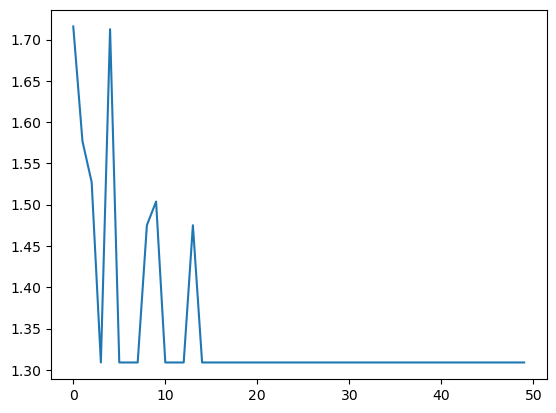

In [101]:
# Code goes here
def steepest_ascent_hill_climbing_with_random_restarts(tsp, initial_tour_pair,numRestarts,problem_size):
    initial_final_tour_pair = steepest_ascent_hill_climbing(tsp,initial_tour_pair)[0]
    minDistance = tour_pair_max_length(tsp,initial_final_tour_pair)
    lowest_pair = initial_final_tour_pair
    for i in range(numRestarts):
        tour_pair = random_tour_pair(problem_size)
        final_tour_pair = steepest_ascent_hill_climbing(tsp,tour_pair)[0]
        newDistance = tour_pair_max_length(tsp,final_tour_pair)
        if newDistance < minDistance:
            minDistance = newDistance
            lowest_pair = final_tour_pair
    return lowest_pair


tsp = random_tsp(10)# fixed problem instance
tour_pair = random_tour_pair(10)
objFunctions = []
for i in range(50):
    withRestarts = steepest_ascent_hill_climbing_with_random_restarts(tsp,tour_pair,i+1,10)
    objFunctions.append(tour_pair_max_length(tsp,withRestarts))
    print("Restarts:",i+1,":",tour_pair_max_length(tsp,withRestarts))
plt.plot(range(50),objFunctions)

## Stochastic Hill Climbing [1 Point]

Implement an approach that chooses randomly from among all uphill moves. Measure and report the performance of this on the same 50 random problem instances as was done earlier. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [109]:
# Code goes here
def stochastic_hill_climbing(tsp, tour_pair):
    dist=tsp['dist']
    current = tour_pair
    moves = 0
    while True:
        states = generate_states(current)
        uphill_states = []
        for state in states:
            if tour_pair_max_length(tsp,current)>tour_pair_max_length(tsp,state):
                uphill_states.append(state)
        if len(uphill_states)==0:
            return current,moves
        if len(uphill_states)==1:
            current = uphill_states[0]
        else:
            randomInt = np.random.randint(len(uphill_states)-1)
            current = uphill_states[randomInt]
        moves+=1
    return []

objFunctions = []
localMoves = []
for i in range(50):
    tour_pair = random_tour_pair(10)
    tsp = random_tsp(10)
    stochastic = stochastic_hill_climbing(tsp,tour_pair)
    objFunctions.append(tour_pair_max_length(tsp,stochastic[0]))
    print("Instance ",i+1,":",tour_pair_max_length(tsp,stochastic[0]))
    localMoves.append(stochastic[1])
print("Average Objective Function: ", sum(objFunctions)/len(objFunctions))
print("Average Local Moves: ", sum(localMoves)/len(localMoves))

Instance  1 : 2.7714190489661146
Instance  2 : 2.0980221751568955
Instance  3 : 2.2471825510137804
Instance  4 : 1.8246997543465318
Instance  5 : 2.4134254456202178
Instance  6 : 1.9475778308448572
Instance  7 : 2.2142315763654508
Instance  8 : 1.4127751922836294
Instance  9 : 1.7312458924092575
Instance  10 : 1.770369056973913
Instance  11 : 1.8153293179461547
Instance  12 : 2.5953738031545126
Instance  13 : 1.167430310308986
Instance  14 : 1.588437594136023
Instance  15 : 1.3730244912354495
Instance  16 : 2.1414632876755886
Instance  17 : 2.460736263663722
Instance  18 : 2.233089541129792
Instance  19 : 2.0306435401216936
Instance  20 : 2.5158860635342384
Instance  21 : 1.8609992099019708
Instance  22 : 2.4229917237051164
Instance  23 : 2.133329176244854
Instance  24 : 1.7875626996033471
Instance  25 : 2.2128712159002415
Instance  26 : 2.2404080680834566
Instance  27 : 1.6236091026302635
Instance  28 : 2.021201729245267
Instance  29 : 2.0409092255506804
Instance  30 : 2.4076822355463

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state. Implement this and report the performance of on 50 the same random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [110]:
# Code goes here
def first_choice_hill_climbing(tsp, tour_pair):
    dist=tsp['dist']
    current = tour_pair
    moves = 0
    while True:
        newState = current
        states = generate_states(current)
        np.random.shuffle(states)
        for state in states:
            if tour_pair_max_length(tsp,newState)>tour_pair_max_length(tsp,state):
                newState = state
                moves+=1
                break
        if newState == current:
            return newState,moves
        current = newState
    return []

objFunctions = []
localMoves = []
for i in range(50):
    tour_pair = random_tour_pair(10)
    tsp = random_tsp(10)
    firstChoice = first_choice_hill_climbing(tsp,tour_pair)
    objFunctions.append(tour_pair_max_length(tsp,firstChoice[0]))
    print("Instance ",i+1,":",tour_pair_max_length(tsp,firstChoice[0]))
    localMoves.append(firstChoice[1])
print("Average Objective Function: ", sum(objFunctions)/len(objFunctions))
print("Average Local Moves: ", sum(localMoves)/len(localMoves))

Instance  1 : 2.329760434331457
Instance  2 : 2.554835367709549
Instance  3 : 2.2599014389553957
Instance  4 : 2.0686316260817
Instance  5 : 2.105729245033147
Instance  6 : 2.1148718629130765
Instance  7 : 2.6883334326191273
Instance  8 : 2.323135120101577
Instance  9 : 2.009771644947135
Instance  10 : 1.451105528901816
Instance  11 : 1.8683539573045067
Instance  12 : 2.304755739306518
Instance  13 : 2.407585421705723
Instance  14 : 2.0546611425821673
Instance  15 : 1.9084292921471007
Instance  16 : 2.1634494802886826
Instance  17 : 2.0439518011228768
Instance  18 : 2.256109330404657
Instance  19 : 2.2129226952083467
Instance  20 : 1.48008136269861
Instance  21 : 2.685520245243588
Instance  22 : 2.6387541079969097
Instance  23 : 2.841059866318835
Instance  24 : 1.8113532019339371
Instance  25 : 1.812590201151843
Instance  26 : 2.002651622639007
Instance  27 : 2.102262815184678
Instance  28 : 2.5101409382382167
Instance  29 : 2.0117649836703357
Instance  30 : 2.307326139921141
Instance 

## Simulated Annealing [1 Point]

Implement an algorithm that uses simulated annealing to solve the problem, as described in the lectures and book (Section 4.1.2). Experiment with hyperparameters like the temperature schedule and thresholds until you find values that work well.

In [124]:
# Code goes here
# Classic simulated annealing: T_t = T_0/log(1+t)
# Fast simulated annealing (T_t = T_0/(1+t))
# Exponential cooling (T_t = T_0 a^t)
def classic_anneal(t0,t):
    return t0/(math.log(1+t))

def fast_simulated_anneal(t0,t):
    return t0/(1+t)

def exponential_anneal(t0,t,a=np.random.uniform(0.8,1.0)):
    return t0*(a**t)


def simulated_annealing(tsp, tour_pair, t0, anneal):
    dist = tsp['dist']
    current = tour_pair
    t = 1
    while True:
        if anneal(t0,t) == 0 or t>50: 
            break
        states = generate_states(current)
        randomInt = np.random.randint(len(states)-1)
        state= states[randomInt]
        if(tour_pair_max_length(tsp,state)<tour_pair_max_length(tsp,current)):
            current = state
        else:
            prob = math.exp((tour_pair_max_length(tsp,current)-tour_pair_max_length(tsp,state))/anneal(t0,t))
            if np.random.uniform(0.0,1.0) <= prob:
                current = state
        t+=1
    return current
        
        
objFunctions = []
for i in range(30):
    tour_pair = random_tour_pair(10)
    tsp = random_tsp(10)
    for i in [0.5,0.75,0.8]:
        for method in [classic_anneal,fast_simulated_anneal,exponential_anneal]:
            annealing = simulated_annealing(tsp,tour_pair,i,method)
            objFunctions.append(tour_pair_max_length(tsp,annealing))
            print("t0:",i,tour_pair_max_length(tsp,annealing))
    print("Average Objective Function: ", sum(objFunctions)/len(objFunctions))


t0: 0.5 2.774495290458803
t0: 0.5 2.2310902128545096
t0: 0.5 1.9633664946629277
t0: 0.75 2.3027730564237503
t0: 0.75 2.114187852029043
t0: 0.75 2.355588476955992
t0: 0.8 2.7896035320615433
t0: 0.8 2.2548643077869834
t0: 0.8 2.5633712334409173


t0: 0.5 2.2579013777342793
t0: 0.5 2.255830872532296
t0: 0.5 2.425290382178083
t0: 0.75 2.064903582860671
t0: 0.75 2.105594223093469
t0: 0.75 3.16649267599233
t0: 0.8 2.006518946434548
t0: 0.8 1.959563026540349
t0: 0.8 2.2083228499611733


t0: 0.5 2.7922240991636387
t0: 0.5 1.5552004646670126
t0: 0.5 1.863945918930766
t0: 0.75 2.455727126008853
t0: 0.75 1.763325018326104
t0: 0.75 2.6499736597898838
t0: 0.8 1.6996523843772948
t0: 0.8 1.6660736569595327
t0: 0.8 2.6279875573207967


t0: 0.5 2.1880651744276034
t0: 0.5 2.3694166922931883
t0: 0.5 2.69153778147571
t0: 0.75 2.39157934608267
t0: 0.75 2.30091203245998
t0: 0.75 2.5499110827437352
t0: 0.8 2.427359484272859
t0: 0.8 2.4048477790155576
t0: 0.8 2.6389845957104288


t0: 0.5 1.8816911042309172
t0

## Compare Performance [1 Point]

Compare simulated annealing with random restarts and stochastic hill climbing. Analyze which algorithm is better for 10 cities, 20 cities, and 50 cities. To make the comparison fair, try to ensure the time taken for each approach is roughly the same.

For timing you can use the `time` package.

In [ ]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

In [ ]:
# Code and results go here

## Tour US States [3 points]

Take your best performing approach for 50 cities and try to find the minimum objective value for a modified version of the two salesman problem going around the 48 lower US states. The modification is that both tours must start and end in New York. New York is the only state shared between the two tours.

Each state is considered visited if you can get to its centroid and it is assumed straight line distances between centroids based on GPS coordinates is the way we want to measure distances.

Plot the minimum objective value 2-tsp tours that you find in red and blue, like was done before for the randomly generated points. Print the length of the best tours, as well as the list of indices corresponding to states (Louisiana=0, Maryland=1, ... , see code below).

In [ ]:
import geopandas as gpd

def get_state_centroids():

    # load pickled data from states.pkl if it exists
    try:
        states = pd.read_pickle('states.pkl')
        print('Loaded from states.pkl')
    except:
        states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

        # pickle (save) the data to states.pkl so we don't need to download in the future
        states.to_pickle('states.pkl')

        print('Downloaded data and saved to states.pkl')

    # Filter out Alaska, Hawaii, and territories
    contiguous_usa = states[~states['STUSPS'].isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS', 'DC'])]

    # Get centroid data
    contiguous_usa = contiguous_usa.to_crs(epsg=2163)
    centroids = contiguous_usa.geometry.centroid
    contiguous_usa['centroid_lon'] = centroids.x
    contiguous_usa['centroid_lat'] = centroids.y

    # Create tuples (state name, x-coordinate, y-coordinate)
    state_tuples = list(zip(contiguous_usa['NAME'], centroids.x, centroids.y))

    return contiguous_usa, state_tuples

def draw_contiguous_usa_map_with_centroids():
    contiguous_usa, state_tuples = get_state_centroids()

    print(state_tuples)
    print(len(state_tuples))

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    # Plot centroids
    for statename, x, y in state_tuples:
        color = 'red' if statename == 'New York' else 'grey'
        plt.plot(x, y, marker='o', color=color, markersize=5)

    plt.title("USA with State Centroids")
    plt.show()

draw_contiguous_usa_map_with_centroids()



---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
